## Test a Multiple Regression Model 

***

## Project Description

**Data preparation for this assignment:**

1) If your response variable is categorical, you will need to identify a quantitative variable in the data set that you can use as a response variable for this assignment. Variables with response scales with 4-5 values that represent a change in magnitude (eg, "strongly disagree to strongly agree", "never to often") can be considered quantitative for the assignment.

**The assignment:**

1) what you found in your multiple regression analysis. Discuss the results for the associations between all of your explanatory variables and your response variable. Make sure to include statistical results (Beta coefficients and p-values) in your summary. 

2) Report whether your results supported your hypothesis for the association between your primary explanatory variable and the response variable. 

3) Discuss whether there was evidence of confounding for the association between your primary explanatory and response variable (Hint: adding additional explanatory variables to your model one at a time will make it easier to identify which of the variables are confounding variables); and 

4) generate the following regression diagnostic plots:

a) q-q plot

b)  standardized residuals for all observations

c) leverage plot

d) Write a few sentences describing what these plots tell you about your regression model in terms of the distribution of the residuals, model fit, influential observations, and outliers. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| incomeperperson|	2010 Gross Domestic Product per capita in constant 2000 US$.|
| alcconsumption|	2008 alcohol consumption per adult (age 15+), litres|
| armedforcesrate|	Armed forces personnel (% of total labor force)|
| breastcancerper100TH|	2002 breast cancer new cases per 100,000 female|
| co2emissions|	2006 cumulative CO2 emission (metric tons)|
| femaleemployrate|	2007 female employees age 15+ (% of population)|
| employrate|	2007 total employees age 15+ (% of population)|
| HIVrate|	2009 estimated HIV Prevalence %|
| Internetuserate|	2010 Internet users (per 100 people)|
| lifeexpectancy|	2011 life expectancy at birth (years)|
| oilperperson|	2010 oil Consumption per capita (tonnes per year and person)|
| polityscore|	2009 Democracy score (Polity)|
| relectricperperson|	2008 residential electricity consumption, per person (kWh)|
| suicideper100TH|	2005 Suicide, age adjusted, per 100 000|
| urbanrate|	2008 urban population (% of total)|

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("gapminderfinal5.csv")

In [3]:
df

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3,1,1,0.101449
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0,3,2,0.155844
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2,0,0,0.101449
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2,0,1,0.101449


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incomeperperson       213 non-null    float64
 1   alcconsumption        213 non-null    float64
 2   armedforcesrate       213 non-null    float64
 3   breastcancerper100th  213 non-null    int64  
 4   co2emissions          213 non-null    float64
 5   femaleemployrate      213 non-null    float64
 6   hivrate               213 non-null    float64
 7   internetuserate       213 non-null    int64  
 8   lifeexpectancy        213 non-null    int64  
 9   oilperperson          213 non-null    float64
 10  polityscore           213 non-null    int64  
 11  relectricperperson    213 non-null    float64
 12  suicideper100th       213 non-null    int64  
 13  employrate            213 non-null    float64
 14  urbanrate             213 non-null    float64
 15  demoscorecat          2

In [5]:
df.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,8740.966338,6.689484,1.443052,37.323944,5033.244131,47.549531,1.936854,35.685446,69.751174,1.481362,3.765258,1173.179390,9.685446,58.63662,56.769390,2.061033,2.000000,2.000000,1.990610,0.126761
std,13466.912542,4.589345,1.498692,20.443277,24936.503422,13.364005,3.632102,26.418255,9.241981,0.987116,5.487663,1341.777091,5.955782,9.61196,23.275759,1.009872,1.420869,1.420869,1.417514,0.076255
min,103.780000,0.030000,0.000000,4.000000,0.000000,11.300000,0.060000,0.000000,48.000000,0.030000,-10.000000,0.000000,0.000000,32.00000,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,952.830000,3.230000,0.570000,23.000000,38.000000,40.300000,0.200000,12.000000,65.000000,1.480000,1.000000,431.630000,6.000000,53.50000,37.340000,2.000000,1.000000,1.000000,1.000000,0.101449
50%,3665.350000,6.690000,1.210000,35.000000,235.000000,47.550000,1.200000,36.000000,72.000000,1.480000,4.000000,1173.180000,10.000000,58.64000,56.770000,2.000000,2.000000,2.000000,2.000000,0.101449
75%,8740.970000,9.500000,1.440000,44.000000,2422.000000,53.600000,1.940000,52.000000,76.000000,1.480000,8.000000,1173.180000,12.000000,63.70000,73.500000,3.000000,3.000000,3.000000,3.000000,0.155844
max,105147.440000,23.010000,10.640000,101.000000,334221.000000,83.300000,25.900000,96.000000,83.000000,12.230000,10.000000,11154.760000,36.000000,83.20000,100.000000,3.000000,4.000000,4.000000,4.000000,0.291667


In [6]:
df.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate', 'demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat'], dtype='object')

In [7]:
df[['demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat']] = df[['demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat']].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   incomeperperson       213 non-null    float64 
 1   alcconsumption        213 non-null    float64 
 2   armedforcesrate       213 non-null    float64 
 3   breastcancerper100th  213 non-null    int64   
 4   co2emissions          213 non-null    float64 
 5   femaleemployrate      213 non-null    float64 
 6   hivrate               213 non-null    float64 
 7   internetuserate       213 non-null    int64   
 8   lifeexpectancy        213 non-null    int64   
 9   oilperperson          213 non-null    float64 
 10  polityscore           213 non-null    int64   
 11  relectricperperson    213 non-null    float64 
 12  suicideper100th       213 non-null    int64   
 13  employrate            213 non-null    float64 
 14  urbanrate             213 non-null    float64 
 15  demosc

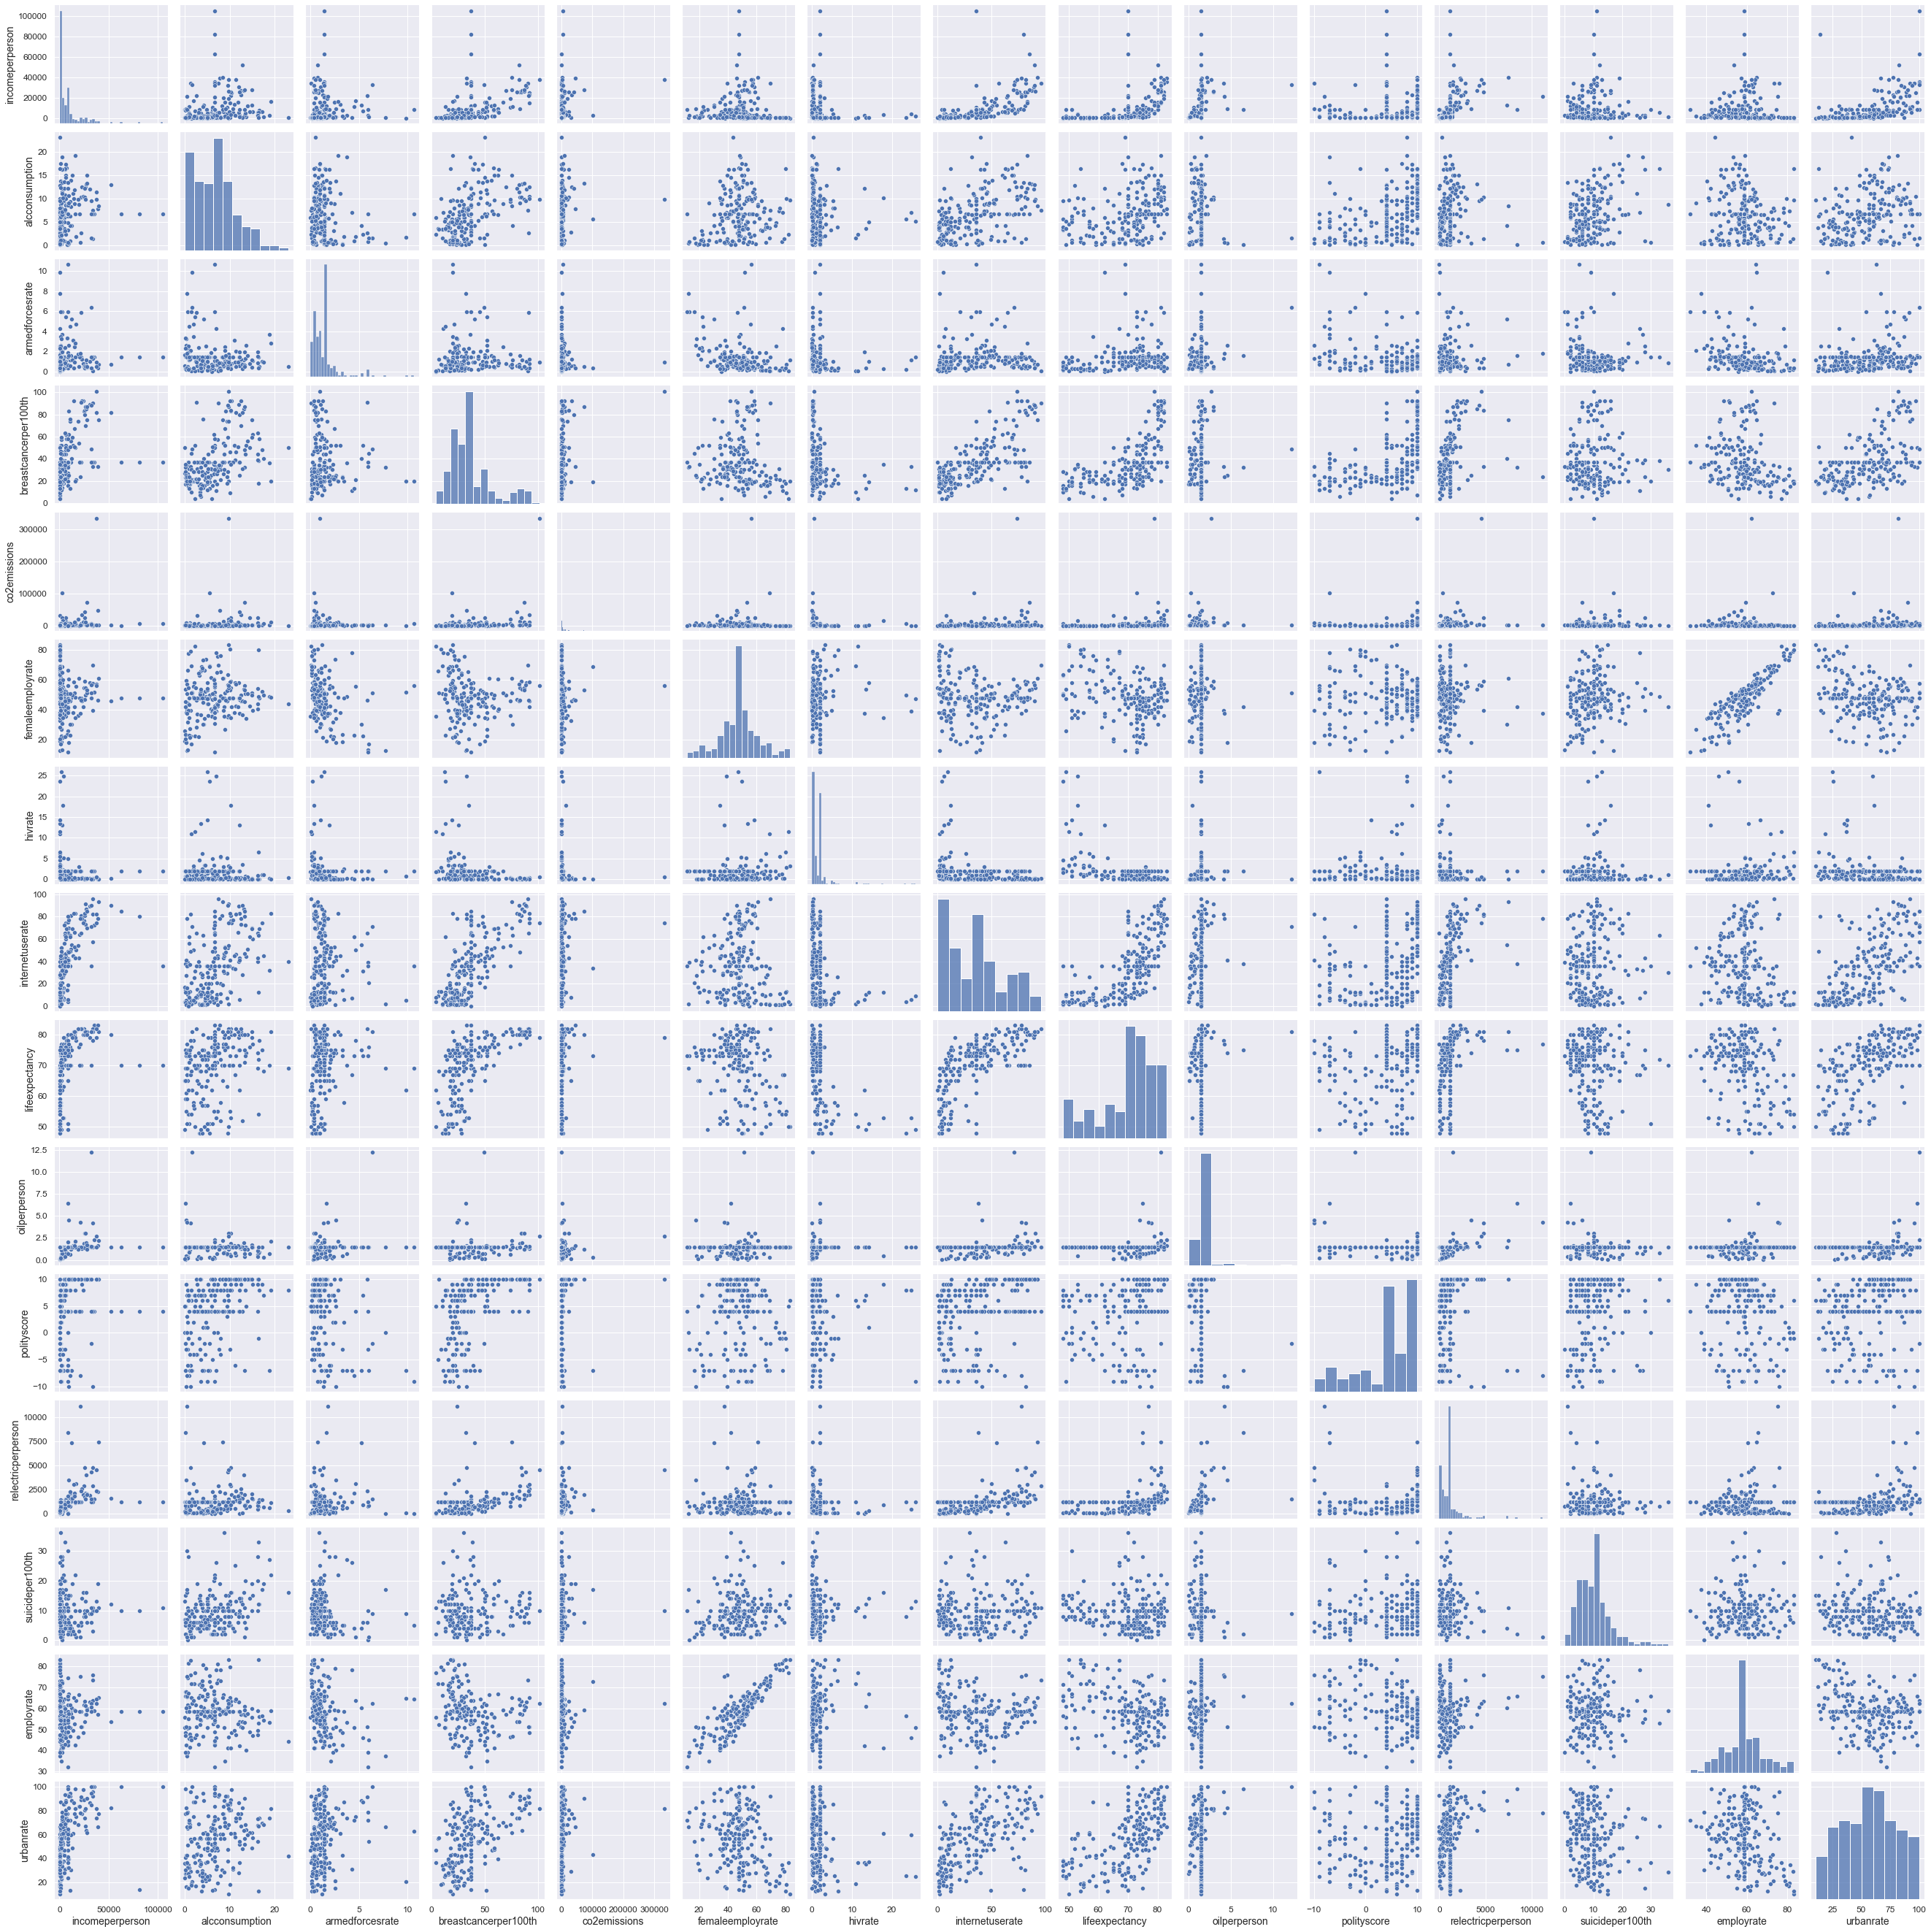

In [9]:
sns.pairplot(df)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### Levene's Test

In [10]:
# scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
#                    ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

## T-Test

### One Sample T-Test

In [11]:
# t, p = scipy.stats.ttest_1samp(a=df.dose, popmean=1.166667)

In [12]:
# print("T-test value is: ", t)
# print("p-value value is: ", p)

### Two Samples T-Test

In [13]:
#t, p = scipy.stats.ttest_ind(a=df.len,b=df.dose, equal_var = True/False)

In [14]:
# print("T-test value is: ",t)
# print("p-value value is: ",p)

### ANOVA

We are testing does democracy score affects income per person:

Explainary variable: Democracy score

Target variable: incomeperperson

State the hypothesis

-   $H_0: µ\_1 = µ\_2$ (the two population means are equal)
-   $H_1:$ At least one of the means differ


In [15]:
#df.columns

In [16]:
#df = df[['incomeperperson','demoscorecat']]

In [17]:
#df.head()

### One Way ANOVA

In [18]:
#mod = ols('demoscorecat~incomeperperson', data=df).fit()

In [19]:
#aov_table = sm.stats.anova_lm(mod,typ=2)

In [20]:
#aov_table

In [21]:
#print(mod.summary())

In [22]:
#mod.pvalues

In [23]:
# f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
# print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

### Two-way ANOVA

In [24]:
#mod1 = ols('len~supp+dose', data=df).fit()

In [25]:
#aov1 = sm.stats.anova_lm(mod1,typ=2)

In [26]:
#aov1

### Chi-square

State the hypothesis:

-   $H_0:$ The proportion of CO2 emissions who are tenured is independent of democracy score
-   $H_1:$ The proportion of CO2 emissions who are tenured is associated with democracy score

In [27]:
#df = df[['co2cat','demoscorecat']]

In [28]:
#df.head()

Response variable is demoscorecat.

In [29]:
#df.demoscorecat.unique()

In [30]:
#df2 = df[df.demoscorecat != 3]

In [31]:
#df2.head()

In [32]:
#df3 = df2[df2.demoscorecat != 2]

In [33]:
#df3

In [34]:
#df3.reset_index(inplace=True, drop=True)

In [35]:
#Create a Cross-tab table

# cont_table  = pd.crosstab(df3['co2cat'], df3['demoscorecat'])
# cont_table

In [36]:
#chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [37]:
#print(f"Chi score is", chi_square[0])

In [38]:
#print("P-value is", chi_square[1])

In [39]:
#print("Degrees of freedom is", chi_square[2])

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [40]:
#pearson_correlation = scipy.stats.pearsonr(df['employrate'], df['incomeperperson'])

In [41]:
#print("Pearson's correlation coefficient is", pearson_correlation[0])

In [42]:
#print("P-value is", pearson_correlation[1])

## Regression Analysis

In [43]:
df.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate', 'demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat'], dtype='object')

In [44]:
y = df['incomeperperson']
X = df[['internetuserate','lifeexpectancy','relectricperperson','employrate','urbanrate']]

In [45]:
X = sm.add_constant(X)

In [46]:
model = sm.OLS(y,X).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        incomeperperson   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     32.81
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.42e-24
Time:                        14:06:53   Log-Likelihood:                -2264.8
No. Observations:                 213   AIC:                             4542.
Df Residuals:                     207   BIC:                             4562.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.059e+04   9418.190     -1.124      0.262   -2.92e+04    7979.979
internetuserate      281.9253     41.218      6.840      0.000     200.665     363.186
lifeexpectancy      -100.2879    113.407     -0.884      0.378    -323.868     123.292
relectricperperson     0.7938      0.615      1.290      0.198      -0.419       2.007
employrate           155.1710     80.676      1.923      0.056      -3.881     314.223
urbanrate            109.8040     39.709      2.765      0.006      31.519     188.089
==============================================================================
Omnibus:                      261.305   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14594.720
Skew:                           5.106   Prob(JB):                         0.00
Kurtosis:                      42.245   Cond. No.                     2.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model.pvalues

const                 2.622318e-01
internetuserate       8.763102e-11
lifeexpectancy        3.775482e-01
relectricperperson    1.984422e-01
employrate            5.580431e-02
urbanrate             6.201922e-03
dtype: float64

In [49]:
model.params

const                -10587.892399
internetuserate         281.925293
lifeexpectancy         -100.287921
relectricperperson        0.793759
employrate              155.170998
urbanrate               109.803966
dtype: float64

## Summary

In [50]:
result1 = pd.DataFrame(model.pvalues, columns=["P-value"])

In [51]:
result1

,P-value
const,2.622318e-01
internetuserate,8.763102e-11
lifeexpectancy,3.775482e-01
relectricperperson,1.984422e-01
employrate,5.580431e-02
urbanrate,6.201922e-03


In [52]:
result2 = pd.DataFrame(model.params, columns=["Coef"])

In [53]:
result2

,Coef
const,-10587.892399
internetuserate,281.925293
lifeexpectancy,-100.287921
relectricperperson,0.793759
employrate,155.170998
urbanrate,109.803966


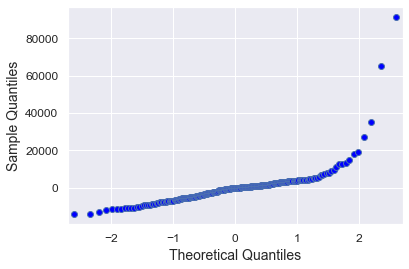

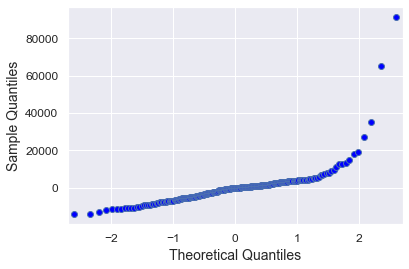

In [54]:
sm.qqplot(model.resid)

In [55]:
stdres = pd.DataFrame(model.resid_pearson)

In [56]:
stdres

,0
0,1.070906
1,-0.596540
2,0.126874
3,-0.302448
4,-0.377750
...,...
208,-0.331644
209,0.266119
210,0.472965
211,-0.036696


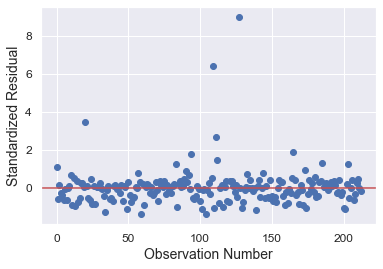

In [57]:
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.show()

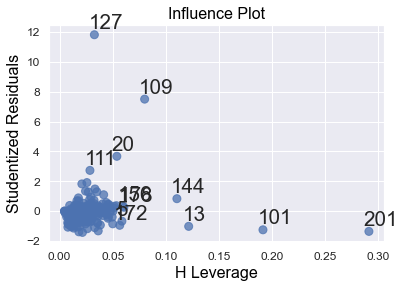

In [58]:
sm.graphics.influence_plot(model, size=8)
plt.show()

#### Python code done by Dennis Lam